***Workers*** **сука** ***Workers*** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [3]:
works = pd.read_csv('ekoniva-dataset/works_new.csv')
fields = pd.read_csv('ekoniva-dataset/fields_new.csv')

In [4]:
df = works.merge(fields, 'left', on=['field', 'season'])
df = df.rename(columns={
    'area_x': 'completed_work_area',
    'area_y': 'field_area'
})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174683 entries, 0 to 174682
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   season               174683 non-null  int64  
 1   field                174683 non-null  object 
 2   work_type            174683 non-null  object 
 3   work_subtype         174683 non-null  object 
 4   start_date           174683 non-null  object 
 5   end_date             165679 non-null  object 
 6   completed_work_area  174683 non-null  float64
 7   main_tech            174683 non-null  object 
 8   add_tech             126143 non-null  object 
 9   mech                 174683 non-null  object 
 10  proc_depth           42121 non-null   float64
 11  prod_purpose         33861 non-null   object 
 12  prod_weight          174683 non-null  float64
 13  Unnamed: 13          164174 non-null  float64
 14  Unnamed: 14          164174 non-null  float64
 15  prod_dry_perc    

In [6]:
df['yield_fact'] = df['prod_weight'] / df['completed_work_area']

In [7]:
df['completed_work_area'].value_counts().min()

np.int64(1)

In [8]:
df['yield_fact'].value_counts()

yield_fact
0.000000     137936
2.940000         81
1.610000         51
1.050000         40
2.450000         26
              ...  
28.820638         1
91.929444         1
18.837447         1
24.788750         1
3.611727          1
Name: count, Length: 25887, dtype: int64

In [9]:
df = df.drop_duplicates(subset=['work_id'], keep='last')

In [10]:
df['work_id'].value_counts()

work_id
A06AD38A-5448-40EC-B095-4B8918B4AC10    1
65EAC7F3-AE95-4E40-935F-11DE27441D19    1
B71A3299-EBFB-4E41-B4B5-01BF58DA569A    1
E3B52B80-1E6A-4418-AFE9-E32F2044588D    1
2572434B-79D6-4891-8861-8869D9809CDA    1
                                       ..
B18E9089-7540-4B4A-B8F2-DA75DB489CF3    1
2CCF28A8-E1BE-4828-8FE8-427CF992053B    1
E4000367-0B52-43A3-A0F7-059797BC588A    1
30010311-37D9-435B-94B2-529616BAF9A1    1
7B02FC19-E99E-4D02-9FE2-EA23BA5EB48F    1
Name: count, Length: 174632, dtype: int64

In [11]:
work_distribution = remove_outliers_iqr(df.groupby(['mech', 'season']).size().reset_index(name='work_count'), 'work_count')

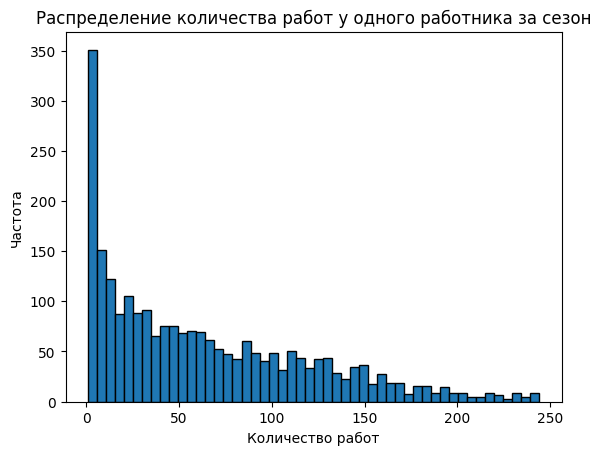

In [12]:
plt.hist(work_distribution['work_count'], bins=50, edgecolor='black')
plt.title('Распределение количества работ у одного работника за сезон')
plt.xlabel('Количество работ')
plt.ylabel('Частота')
plt.show()

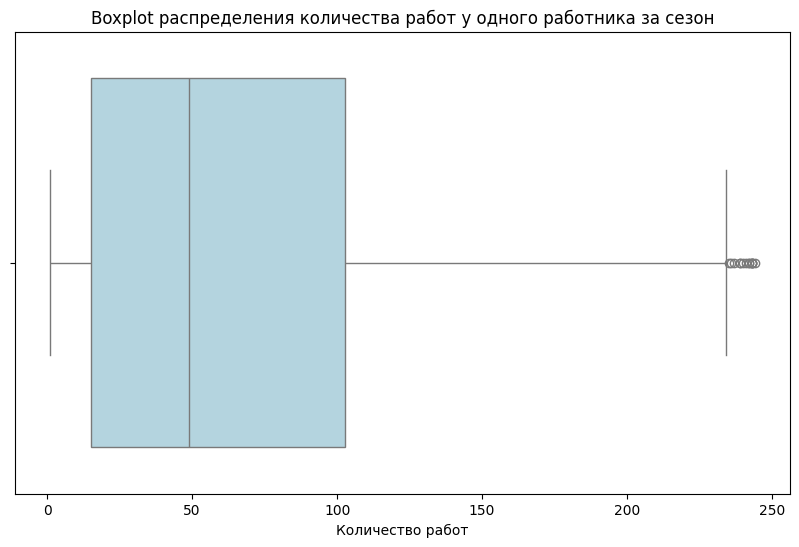

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=work_distribution['work_count'], color='lightblue')
plt.title('Boxplot распределения количества работ у одного работника за сезон')
plt.xlabel('Количество работ')
plt.show()

In [14]:
work_area = remove_outliers_iqr(df[df['season'] == 2023].groupby('mech')['completed_work_area'].sum().reset_index(name='work_area'), 'work_area')

0.5


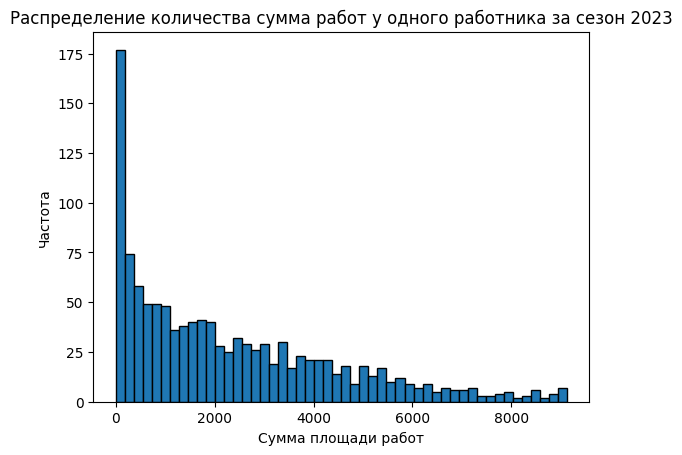

In [15]:
print(work_area['work_area'].min())
plt.hist(work_area['work_area'], bins=50, edgecolor='black')
plt.title('Распределение количества сумма работ у одного работника за сезон 2023')
plt.xlabel('Сумма площади работ')
plt.ylabel('Частота')
plt.show()

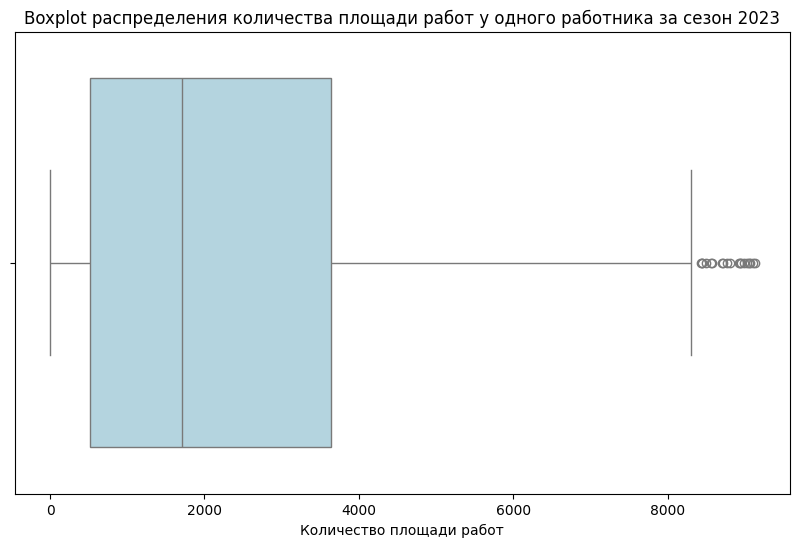

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=work_area['work_area'], color='lightblue')
plt.title('Boxplot распределения количества площади работ у одного работника за сезон 2023')
plt.xlabel('Количество площади работ')
plt.show()

In [17]:
work_area = remove_outliers_iqr(df[df['season'] == 2024].groupby('mech')['completed_work_area'].sum().reset_index(name='work_area'), 'work_area')

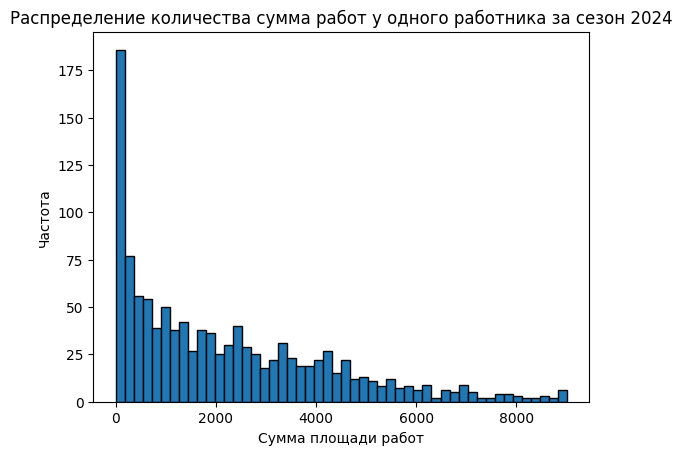

In [18]:
plt.hist(work_area['work_area'], bins=50, edgecolor='black')
plt.title('Распределение количества сумма работ у одного работника за сезон 2024')
plt.xlabel('Сумма площади работ')
plt.ylabel('Частота')
plt.show()

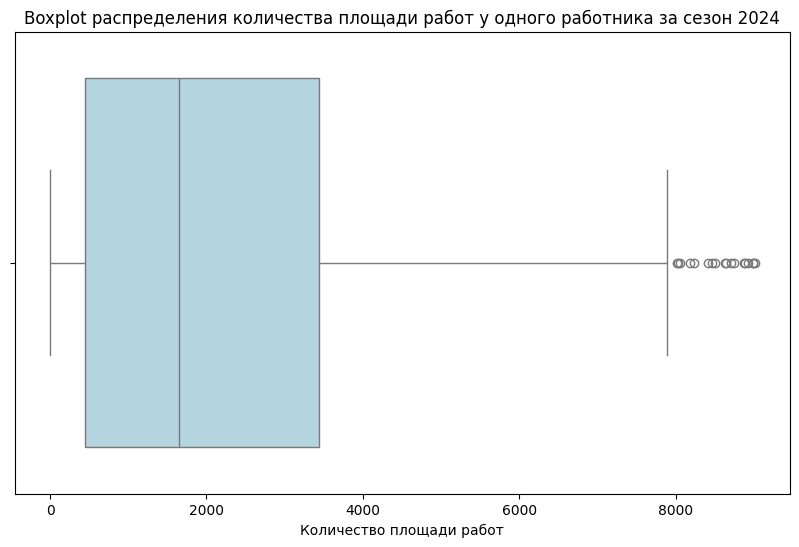

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=work_area['work_area'], color='lightblue')
plt.title('Boxplot распределения количества площади работ у одного работника за сезон 2024')
plt.xlabel('Количество площади работ')
plt.show()

In [20]:
work_unique_distribution = remove_outliers_iqr(df.groupby(['mech', 'season'])['work_type'].nunique().reset_index(name='work_unique_count'), 'work_unique_count')

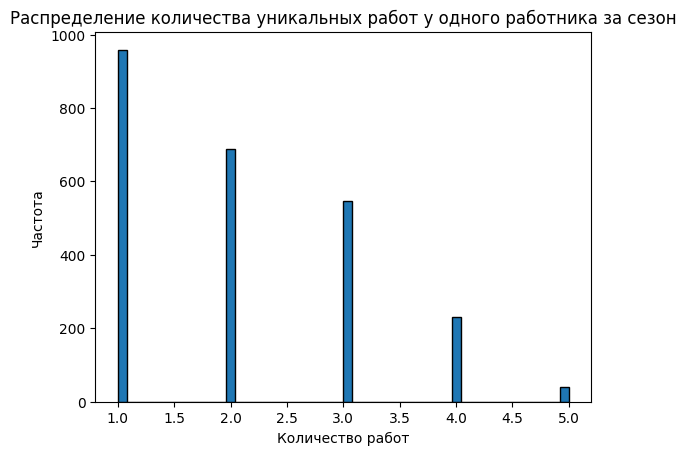

In [21]:
plt.hist(work_unique_distribution['work_unique_count'], bins=50, edgecolor='black')
plt.title('Распределение количества уникальных работ у одного работника за сезон')
plt.xlabel('Количество работ')
plt.ylabel('Частота')
plt.show()

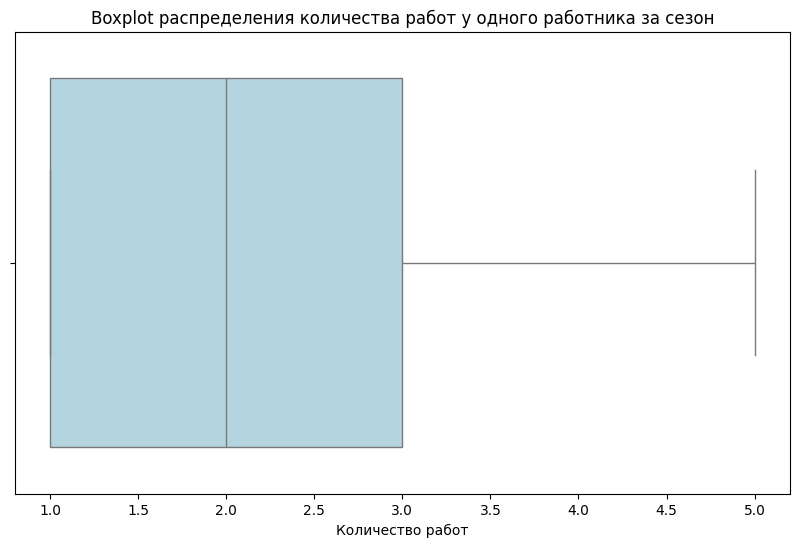

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=work_unique_distribution['work_unique_count'], color='lightblue')
plt.title('Boxplot распределения количества работ у одного работника за сезон')
plt.xlabel('Количество работ')
plt.show()

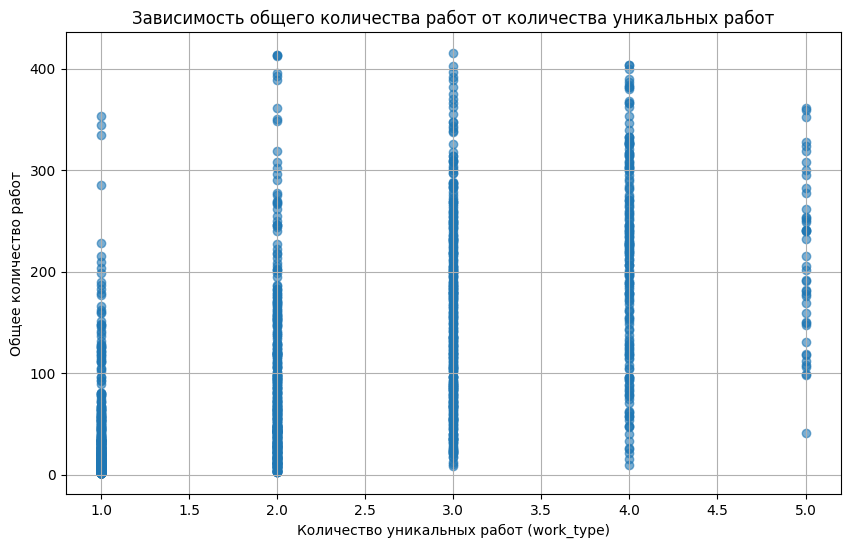

In [23]:
total_work_count = remove_outliers_iqr(df.groupby('mech').size().reset_index(name='total_work_count'), 'total_work_count')

unique_work_count = remove_outliers_iqr(df.groupby('mech')['work_type'].nunique().reset_index(name='unique_work_count'), 'unique_work_count')

merged_data = pd.merge(total_work_count, unique_work_count, on='mech')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['unique_work_count'], merged_data['total_work_count'], alpha=0.6)
plt.title('Зависимость общего количества работ от количества уникальных работ')
plt.xlabel('Количество уникальных работ (work_type)')
plt.ylabel('Общее количество работ')
plt.grid(True)
plt.show()

   season  yield_fact_sum
0    2023    8.282228e+06
1    2024    3.815360e+06


/var/folders/pn/0bn7dksx05d8k5q8rpx3vxm80000gn/T/ipykernel_52192/2879335585.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='yield_fact_sum', data=seasonal_yield_filtered, palette='viridis')


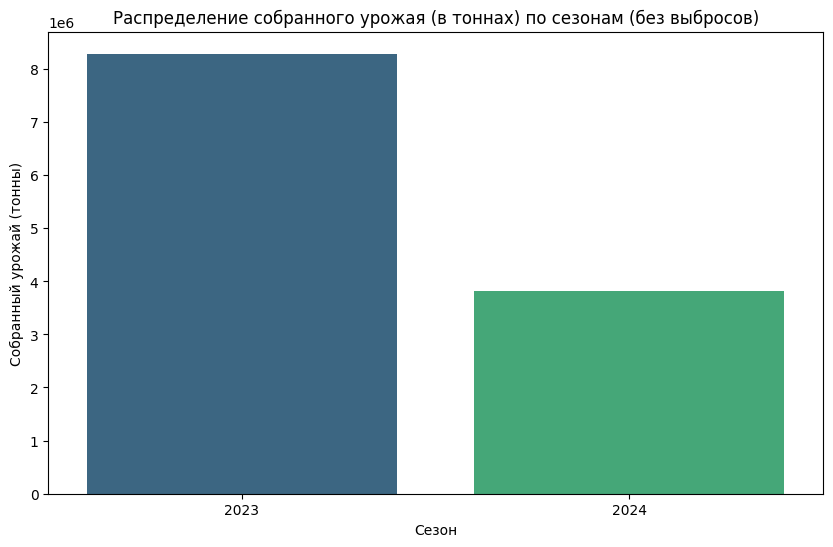

/var/folders/pn/0bn7dksx05d8k5q8rpx3vxm80000gn/T/ipykernel_52192/2879335585.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='yield_fact_sum', data=seasonal_yield_filtered, palette='Set2')


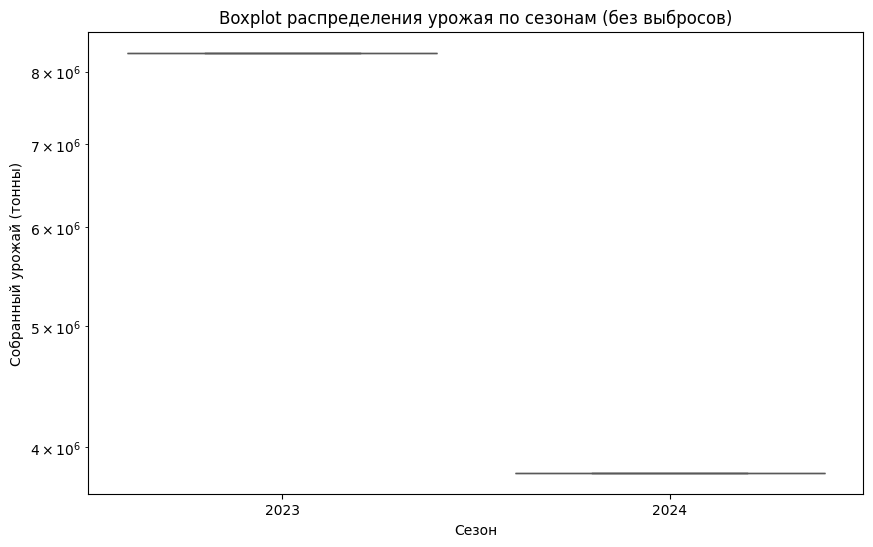

In [24]:
seasonal_yield = df.groupby('season')['yield_fact'].sum().reset_index(name='yield_fact_sum')

seasonal_yield_filtered = remove_outliers_iqr(seasonal_yield, 'yield_fact_sum')

print(seasonal_yield_filtered)

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='yield_fact_sum', data=seasonal_yield_filtered, palette='viridis')
plt.title('Распределение собранного урожая (в тоннах) по сезонам (без выбросов)')
plt.xlabel('Сезон')
plt.ylabel('Собранный урожай (тонны)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='yield_fact_sum', data=seasonal_yield_filtered, palette='Set2')
plt.title('Boxplot распределения урожая по сезонам (без выбросов)')
plt.xlabel('Сезон')
plt.ylabel('Собранный урожай (тонны)')
plt.yscale('log')
plt.show()

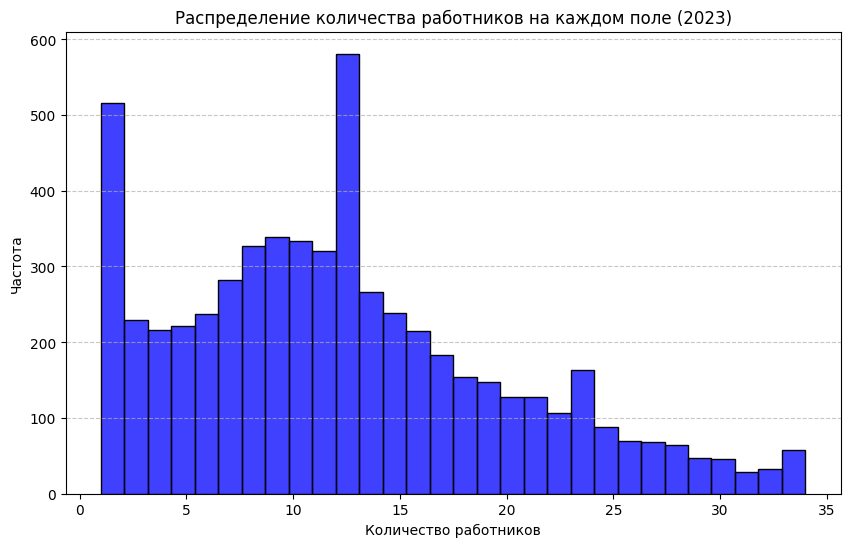

In [25]:
field_workers = remove_outliers_iqr(df[df['season'] == 2023].groupby('field')['work_id'].nunique().reset_index(name='count_workers'), 'count_workers')
plt.figure(figsize=(10, 6))
sns.histplot(field_workers['count_workers'], bins=30, kde=False, color='blue', edgecolor='black')
plt.title('Распределение количества работников на каждом поле (2023)')
plt.xlabel('Количество работников')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

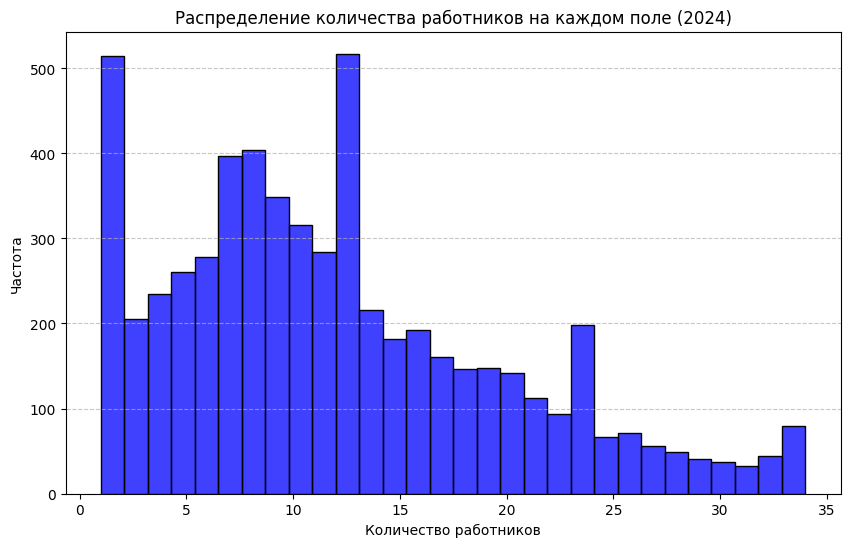

In [26]:
field_workers = remove_outliers_iqr(df[df['season'] == 2024].groupby('field')['work_id'].nunique().reset_index(name='count_workers'), 'count_workers')
plt.figure(figsize=(10, 6))
sns.histplot(field_workers['count_workers'], bins=30, kde=False, color='blue', edgecolor='black')
plt.title('Распределение количества работников на каждом поле (2024)')
plt.xlabel('Количество работников')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

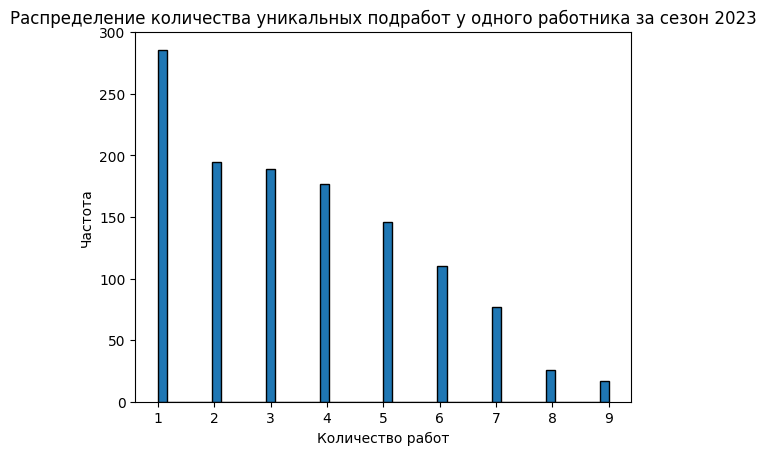

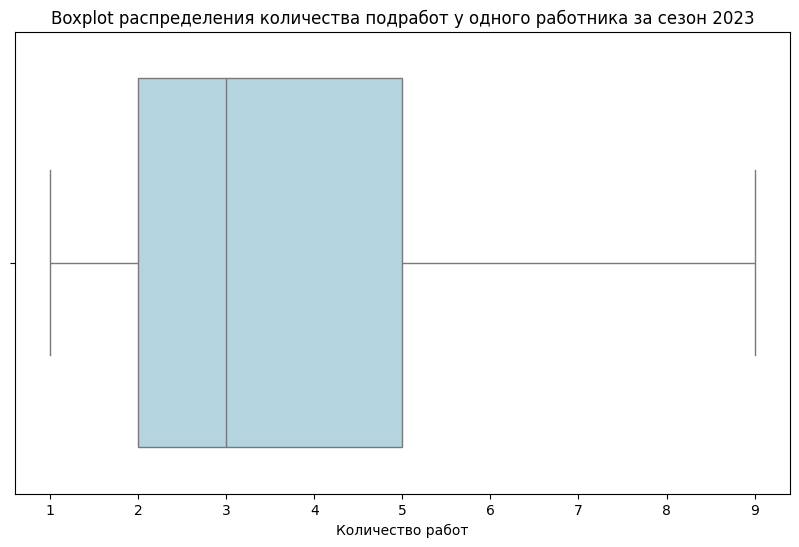

In [27]:
work_unique_distribution = remove_outliers_iqr(df[df['season'] == 2023].groupby('mech')['work_subtype'].nunique().reset_index(name='work_unique_count'), 'work_unique_count')

plt.hist(work_unique_distribution['work_unique_count'], bins=50, edgecolor='black')
plt.title('Распределение количества уникальных подработ у одного работника за сезон 2023')
plt.xlabel('Количество работ')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=work_unique_distribution['work_unique_count'], color='lightblue')
plt.title('Boxplot распределения количества подработ у одного работника за сезон 2023')
plt.xlabel('Количество работ')
plt.show()

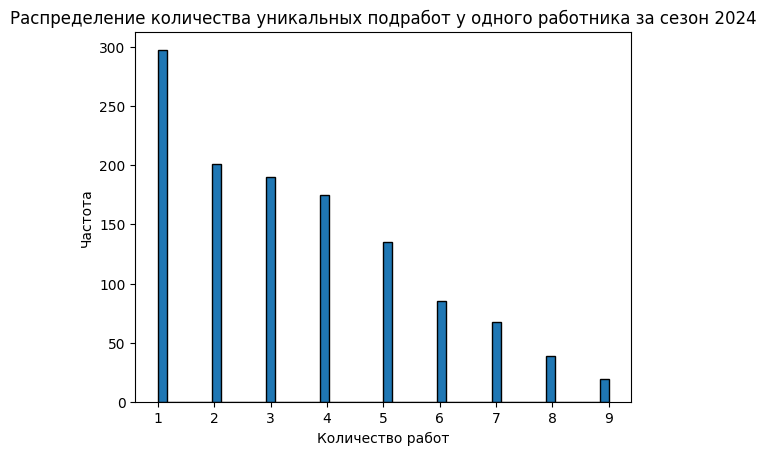

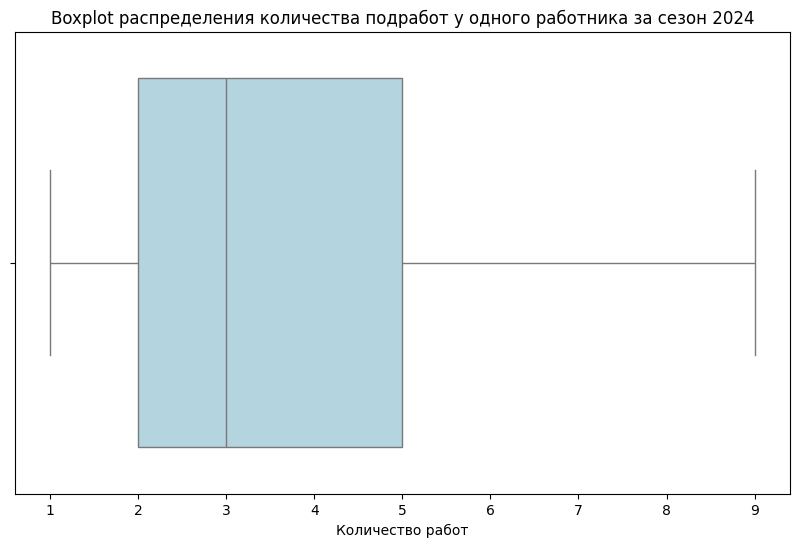

In [28]:
work_unique_distribution = remove_outliers_iqr(df[df['season'] == 2024].groupby('mech')['work_subtype'].nunique().reset_index(name='work_unique_count'), 'work_unique_count')

plt.hist(work_unique_distribution['work_unique_count'], bins=50, edgecolor='black')
plt.title('Распределение количества уникальных подработ у одного работника за сезон 2024')
plt.xlabel('Количество работ')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=work_unique_distribution['work_unique_count'], color='lightblue')
plt.title('Boxplot распределения количества подработ у одного работника за сезон 2024')
plt.xlabel('Количество работ')
plt.show()

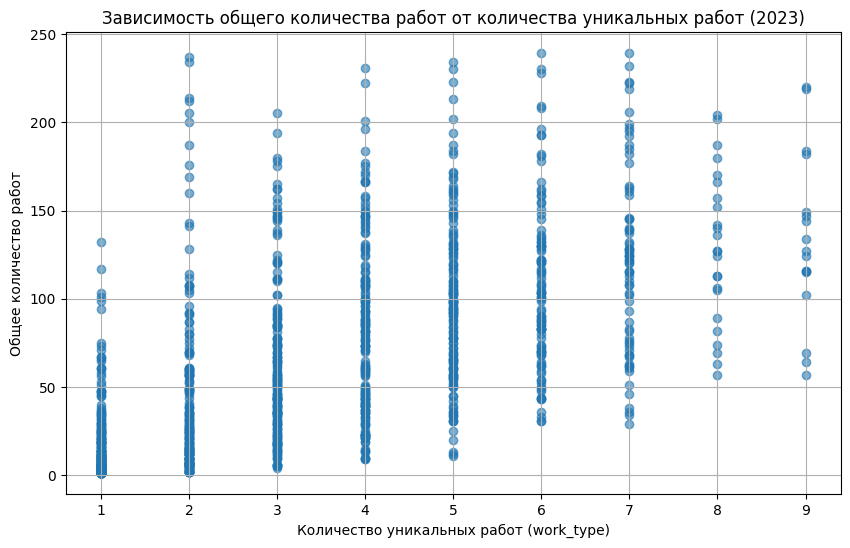

In [29]:
total_work_count = remove_outliers_iqr(df[df['season'] == 2023].groupby('mech').size().reset_index(name='total_work_count'), 'total_work_count')

unique_work_count = remove_outliers_iqr(df[df['season'] == 2023].groupby('mech')['work_subtype'].nunique().reset_index(name='unique_work_count'), 'unique_work_count')

merged_data = pd.merge(total_work_count, unique_work_count, on='mech')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['unique_work_count'], merged_data['total_work_count'], alpha=0.6)
plt.title('Зависимость общего количества работ от количества уникальных работ (2023)')
plt.xlabel('Количество уникальных работ (work_type)')
plt.ylabel('Общее количество работ')
plt.grid(True)
plt.show()

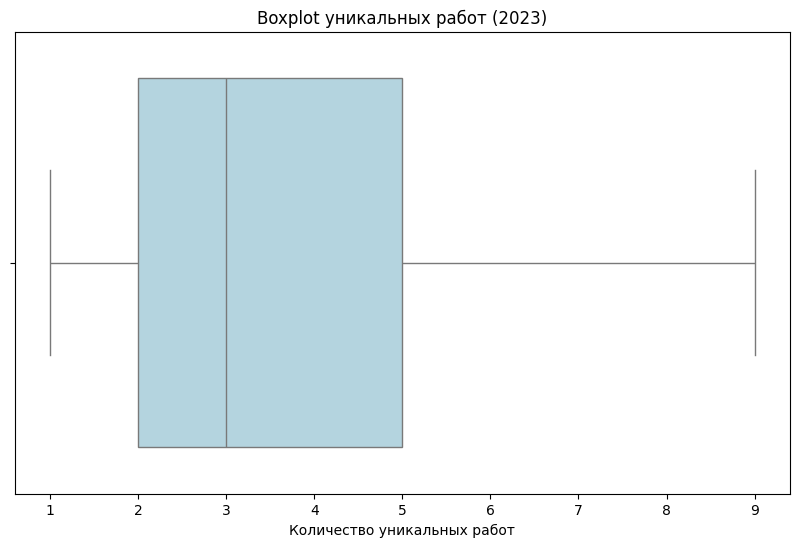

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_data['unique_work_count'], color='lightblue')
plt.title('Boxplot уникальных работ (2023)')
plt.xlabel('Количество уникальных работ')
plt.show()

/var/folders/pn/0bn7dksx05d8k5q8rpx3vxm80000gn/T/ipykernel_52192/3163647210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='unique_work_count', y='total_work_count', data=merged_data, palette='Set2')


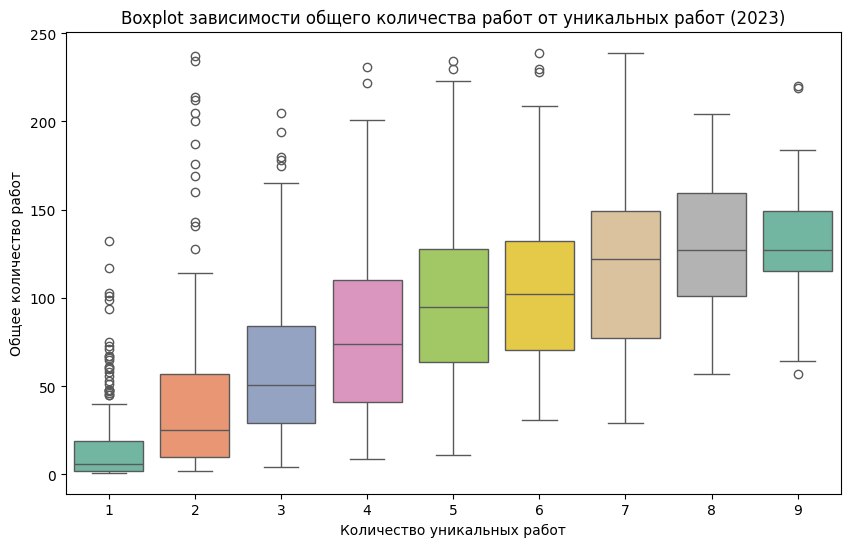

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='unique_work_count', y='total_work_count', data=merged_data, palette='Set2')
plt.title('Boxplot зависимости общего количества работ от уникальных работ (2023)')
plt.xlabel('Количество уникальных работ')
plt.ylabel('Общее количество работ')
plt.show()

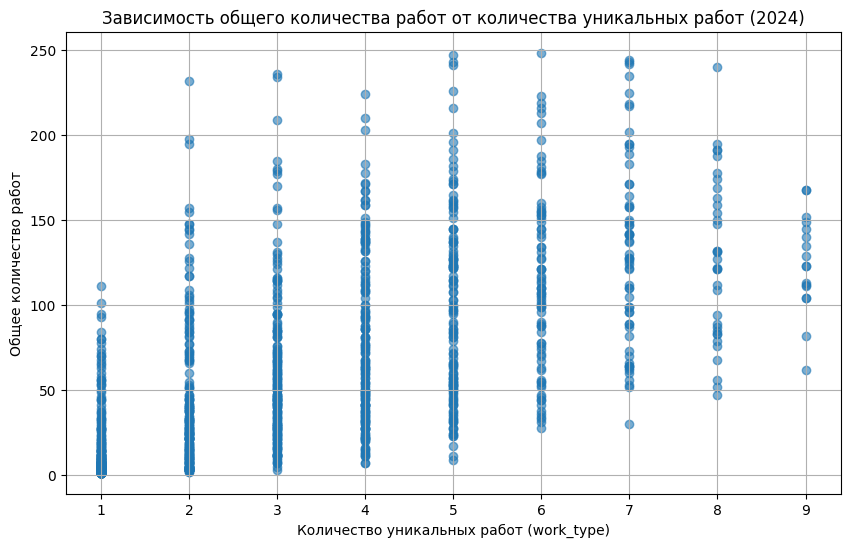

In [32]:
total_work_count = remove_outliers_iqr(df[df['season'] == 2024].groupby('mech').size().reset_index(name='total_work_count'), 'total_work_count')

unique_work_count = remove_outliers_iqr(df[df['season'] == 2024].groupby('mech')['work_subtype'].nunique().reset_index(name='unique_work_count'), 'unique_work_count')

merged_data = pd.merge(total_work_count, unique_work_count, on='mech')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['unique_work_count'], merged_data['total_work_count'], alpha=0.6)
plt.title('Зависимость общего количества работ от количества уникальных работ (2024)')
plt.xlabel('Количество уникальных работ (work_type)')
plt.ylabel('Общее количество работ')
plt.grid(True)
plt.show()

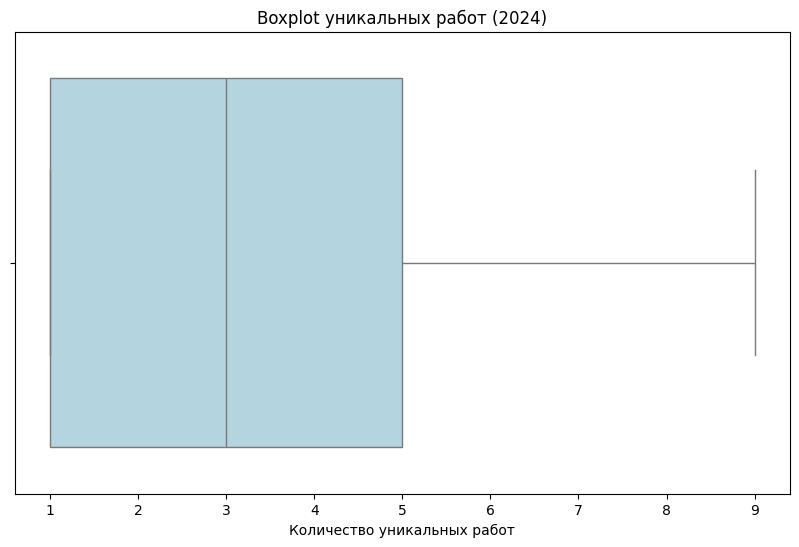

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_data['unique_work_count'], color='lightblue')
plt.title('Boxplot уникальных работ (2024)')
plt.xlabel('Количество уникальных работ')
plt.show()

/var/folders/pn/0bn7dksx05d8k5q8rpx3vxm80000gn/T/ipykernel_52192/1134801633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='unique_work_count', y='total_work_count', data=merged_data, palette='Set2')


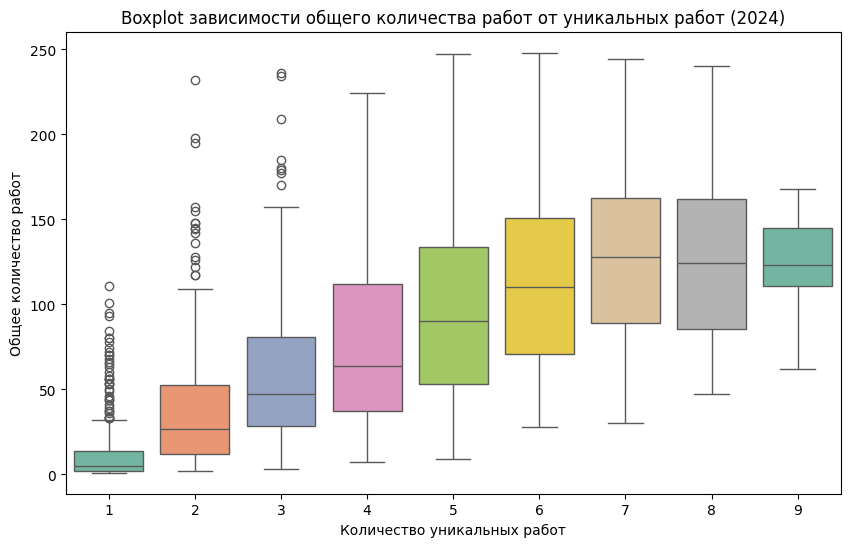

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='unique_work_count', y='total_work_count', data=merged_data, palette='Set2')
plt.title('Boxplot зависимости общего количества работ от уникальных работ (2024)')
plt.xlabel('Количество уникальных работ')
plt.ylabel('Общее количество работ')
plt.show()

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df['yield_fact'] = pd.to_numeric(df['yield_fact'], errors='coerce')

df = df.dropna(subset=['yield_fact'])

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

categorical_features = df.select_dtypes(include=[object]).columns
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df[col] = df[col].fillna('Unknown')
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

features = df.drop(columns=['yield_fact'])
target = df['yield_fact']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                Feature    Importance
12          Unnamed: 14  9.655135e-01
9          prod_purpose  7.494212e-03
1                 field  4.893716e-03
13        prod_dry_perc  3.018645e-03
4   completed_work_area  2.965896e-03
10          prod_weight  1.998304e-03
3          work_subtype  1.962500e-03
30                  k2o  1.665813e-03
21     crop_predecessor  1.656054e-03
16              work_id  1.629132e-03
17               region  1.625808e-03
25         reproduction  9.952660e-04
18            land_type  9.490779e-04
23           field_area  6.750644e-04
27           technology  6.413470e-04
32                   ph  6.000682e-04
20                 crop  5.956584e-04
26          seed_origin  5.271592e-04
24               hybrid  4.228119e-04
6              add_tech  7.116157e-05
5             main_tech  3.537033e-05
31                humus  2.612108e-05
7                  mech  1.189041e-05
29                 p2o5  7.865299e-06
19      fertility_score  6.560698e-06
28          

In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df['prod_weight'] = pd.to_numeric(df['prod_weight'], errors='coerce')

df = df.dropna(subset=['prod_weight'])

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

categorical_features = df.select_dtypes(include=[object]).columns
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df[col] = df[col].fillna('Unknown')
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

features = df.drop(columns=['yield_fact', 'prod_weight', 'Unnamed: 14', 'Unnamed: 13'])
target = df['prod_weight']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                Feature  Importance
4   completed_work_area    0.163864
25           yield_plan    0.131718
7                  mech    0.094427
20           field_area    0.077912
1                 field    0.076208
6              add_tech    0.065093
5             main_tech    0.064520
13              work_id    0.054194
10        prod_dry_perc    0.040814
24           technology    0.024167
27                  k2o    0.019238
26                 p2o5    0.017882
29                   ph    0.017703
21               hybrid    0.016707
22         reproduction    0.016087
3          work_subtype    0.014844
12           prod_impur    0.014379
28                humus    0.013927
11           prod_humid    0.013889
18     crop_predecessor    0.011812
16      fertility_score    0.011738
14               region    0.011512
17                 crop    0.008643
9          prod_purpose    0.005840
0                season    0.004436
23          seed_origin    0.003561
15            land_type    0

/var/folders/pn/0bn7dksx05d8k5q8rpx3vxm80000gn/T/ipykernel_52192/195104066.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='total_unique_work', y='yield_fact_sum', data=merged_data, palette='viridis', s=100)


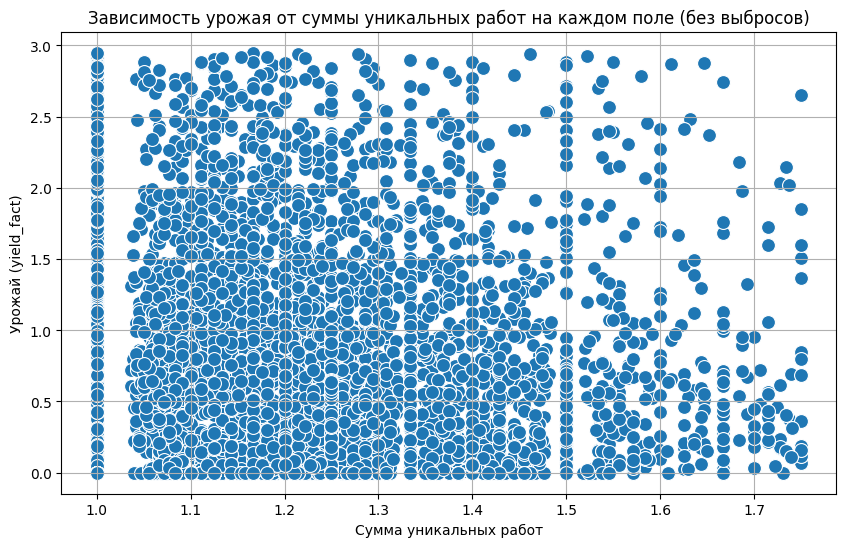

In [64]:
merged_data = remove_outliers_iqr(merged_data, 'total_unique_work')

merged_data = remove_outliers_iqr(merged_data, 'yield_fact_sum')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_unique_work', y='yield_fact_sum', data=merged_data, palette='viridis', s=100)
plt.title('Зависимость урожая от суммы уникальных работ на каждом поле (без выбросов)')
plt.xlabel('Сумма уникальных работ')
plt.ylabel('Урожай (yield_fact)')
plt.grid(True)
plt.show()

Среднеквадратичная ошибка (MSE): 0.43891665870607594
Коэффициент детерминации (R^2): 0.014217575581629616


/var/folders/pn/0bn7dksx05d8k5q8rpx3vxm80000gn/T/ipykernel_52192/293802718.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='total_unique_work', y='yield_fact_sum', data=merged_data, palette='viridis', s=100, label='Фактический урожай')


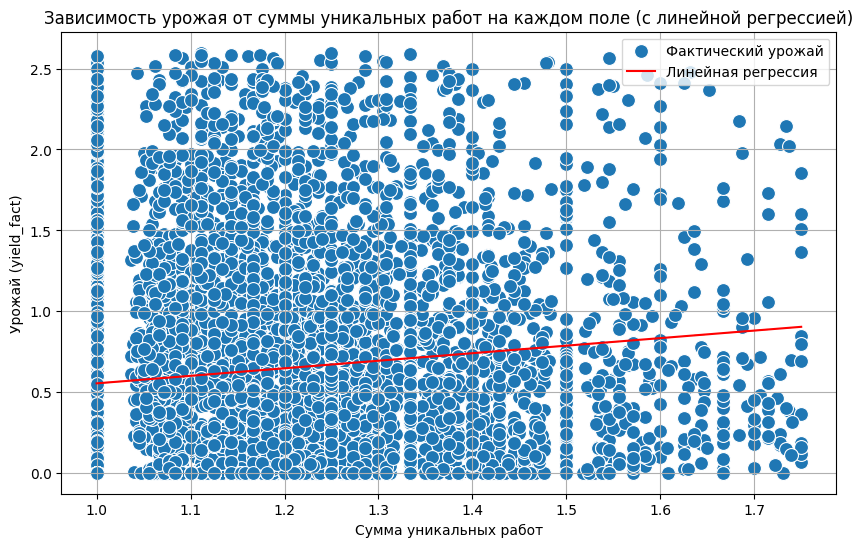

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

merged_data = remove_outliers_iqr(merged_data, 'yield_fact_sum')

X = merged_data[['total_unique_work']]
y = merged_data['yield_fact_sum']

model = LinearRegression()
model.fit(X, y)

merged_data['predicted_yield'] = model.predict(X)

mse = mean_squared_error(y, merged_data['predicted_yield'])
r2 = r2_score(y, merged_data['predicted_yield'])
print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_unique_work', y='yield_fact_sum', data=merged_data, palette='viridis', s=100, label='Фактический урожай')
sns.lineplot(x='total_unique_work', y='predicted_yield', data=merged_data, color='red', label='Линейная регрессия')
plt.title('Зависимость урожая от суммы уникальных работ на каждом поле (с линейной регрессией)')
plt.xlabel('Сумма уникальных работ')
plt.ylabel('Урожай (yield_fact)')
plt.grid(True)
plt.legend()
plt.show()